In [1]:
#changing the working directory

import os
os.chdir('C:/Users/Rohit/Documents/Kaggle/Random_Forest Titanic Dataset')


In [2]:
#importing the libraries


import numpy as np

import pandas as pd

#for data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style


#algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB



In [3]:
#importing the dataset

train_df = pd.read_csv('C:/Users/Rohit/Documents/Kaggle/Random_Forest Titanic Dataset/train.csv')

test_df = pd.read_csv('C:/Users/Rohit/Documents/Kaggle/Random_Forest Titanic Dataset/test.csv')


In [4]:
#data exploration/analysis

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
'''
survival:   Survival
PassengerId: Unique Id of a passenger.
pclass: Ticket class    
sex:    Sex 
Age:    Age in years    
sibsp:  # of siblings / spouses aboard the Titanic  
parch:  # of parents / children aboard the Titanic  
ticket: Ticket number   
fare:   Passenger fare  
cabin:  Cabin number    
embarked:   Port of Embarkation '''

'\nsurvival:   Survival\nPassengerId: Unique Id of a passenger.\npclass: Ticket class    \nsex:    Sex \nAge:    Age in years    \nsibsp:  # of siblings / spouses aboard the Titanic  \nparch:  # of parents / children aboard the Titanic  \nticket: Ticket number   \nfare:   Passenger fare  \ncabin:  Cabin number    \nembarked:   Port of Embarkation '

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
'''
Above we can see that 38% out of the training-set survived the Titanic. 
We can also see that the passenger ages range from 0.4 to 80. 
On top of that we can already detect some features, that contain missing values, like the 'Age' feature.'''

"\nAbove we can see that 38% out of the training-set survived the Titanic. \nWe can also see that the passenger ages range from 0.4 to 80. \nOn top of that we can already detect some features, that contain missing values, like the 'Age' feature."

In [8]:
train_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
'''
From the table above, we can note a few things. 
First of all, that we need to convert a lot of features into numeric ones later on, 
so that the machine learning algorithms can process them. 
Furthermore, we can see that the features have widely different ranges, 
that we will need to convert into roughly the same scale. We can also spot some more features, 
that contain missing values (NaN = not a number), that wee need to deal with.'''

'\nFrom the table above, we can note a few things. \nFirst of all, that we need to convert a lot of features into numeric ones later on, \nso that the machine learning algorithms can process them. \nFurthermore, we can see that the features have widely different ranges, \nthat we will need to convert into roughly the same scale. We can also spot some more features, \nthat contain missing values (NaN = not a number), that wee need to deal with.'

In [10]:
#lets take a detailed look at what data is actually missing

total = train_df.isnull().sum().sort_values(ascending=False)


percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1,1)).sort_values(ascending = False)

missing_data = pd.concat([total,percent_2], axis = 1, keys = ['Total','%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [11]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

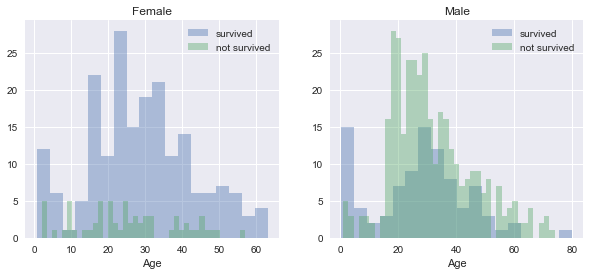

In [12]:
# lets take a look at 1.Age and 2.Sex

survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(10,4))

#seperating women and men out in different df's

women = train_df[train_df['Sex'] == 'female']
men = train_df[train_df['Sex'] == 'male']

#plotting the graph fpr female passengers
sns.set_style('white')
ax = sns.distplot(women[women['Survived'] == 1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde = False)
ax = sns.distplot(women[women['Survived'] == 0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde = False)

ax.legend()
ax.set_title('Female')


#plotting the graph for male passengers

ax = sns.distplot(men[men['Survived'] == 1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived'] == 0].Age.dropna(), bins=40, label = not_survived, ax= axes[1], kde = False)

ax.legend()
ax.set_title('Male')


In [13]:
'''You can see that men have a high probability of survival when they are between 18 and 30 years old, 
which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.

For men the probability of survival is very low between the age of 5 and 18, but that isn't true for women. 
Another thing to note is that infants also have a little bit higher probability of survival.

Since there seem to be certain ages, which have increased odds of survival and 
because I want every feature to be roughly on the same scale, I will create age groups later on.'''

"You can see that men have a high probability of survival when they are between 18 and 30 years old, \nwhich is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.\n\nFor men the probability of survival is very low between the age of 5 and 18, but that isn't true for women. \nAnother thing to note is that infants also have a little bit higher probability of survival.\n\nSince there seem to be certain ages, which have increased odds of survival and \nbecause I want every feature to be roughly on the same scale, I will create age groups later on."

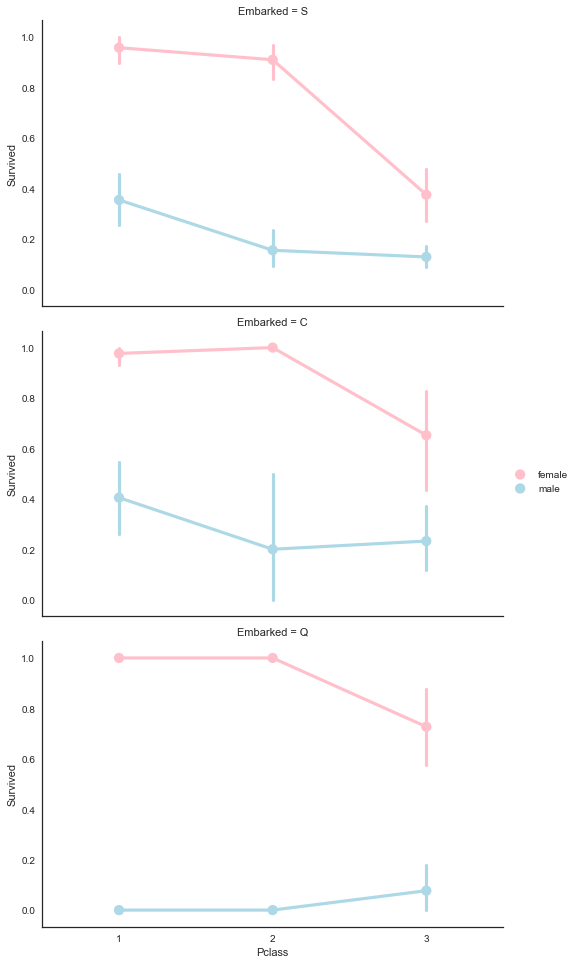

In [14]:
# Now lets take a look at embarked, passenger class and sex

pal = dict(female="pink", male="lightblue")
FacetGrid = sns.FacetGrid(train_df, row = 'Embarked', size = 4.5, aspect = 1.6)

FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = pal, order = None, hue_order = None)

FacetGrid.add_legend()



In [15]:
'''
Embarked seems to be correlated with survival, depending on the gender.

Women on port Q and on port S have a higher chance of survival. 
The inverse is true, if they are at port C. 
Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.

Pclass also seems to be correlated with survival. We will generate another plot of it below.

'''

'\nEmbarked seems to be correlated with survival, depending on the gender.\n\nWomen on port Q and on port S have a higher chance of survival. \nThe inverse is true, if they are at port C. \nMen have a high survival probability if they are on port C, but a low probability if they are on port Q or S.\n\nPclass also seems to be correlated with survival. We will generate another plot of it below.\n\n'

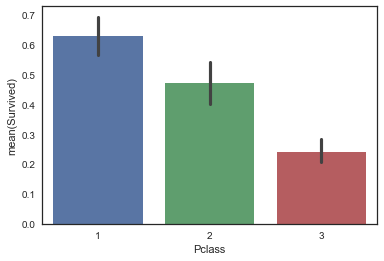

In [16]:
#lets take a deeper look at passenger class

sns.barplot(x = 'Pclass', y = 'Survived', data = train_df)

In [17]:
'''
Here we see clearly, that Pclass is contributing to a persons chance of survival, 
especially if this person is in class 1. We will create another pclass plot below.
'''

'\nHere we see clearly, that Pclass is contributing to a persons chance of survival, \nespecially if this person is in class 1. We will create another pclass plot below.\n'

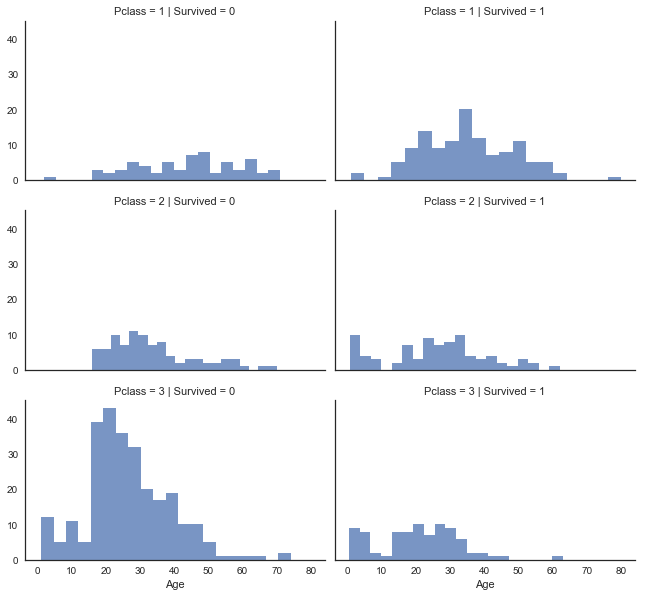

In [18]:
#lets dig more into passenger class

grid = sns.FacetGrid(train_df, col = 'Survived', row = 'Pclass', size = 2.8, aspect=1.6)

grid.map(plt.hist, 'Age', alpha = 0.75, bins = 20)
grid.add_legend()

In [19]:
'''
The plot above confirms our assumption about pclass 1, 
but we can also spot a high probability that a person in pclass 3 will not survive.
'''

'\nThe plot above confirms our assumption about pclass 1, \nbut we can also spot a high probability that a person in pclass 3 will not survive.\n'

In [20]:
#lets take a deeper look at no. of siblings and parents aboard.They make more sense if I combine them together.

#joining them as a list

data = [train_df,test_df]

for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)


'''
this is adding two columns in test and train df as relatives and not_alone
'''

'\nthis is adding two columns in test and train df as relatives and not_alone\n'

In [21]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0


In [22]:
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

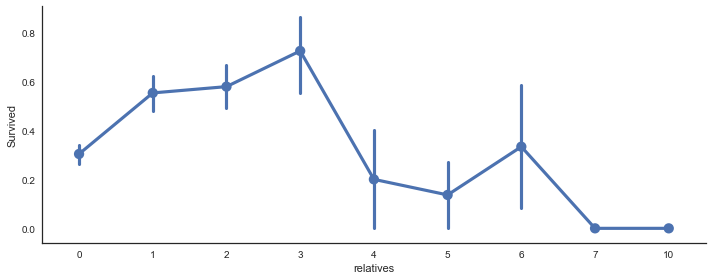

In [23]:
# lets see how no of relatives affect the survival rate

axes = sns.factorplot(x='relatives',y='Survived', data = train_df, aspect = 2.5)

In [24]:
'''
Here we can see that you had a high probabilty of survival with 1 to 3 realitves,
but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).
'''

'\nHere we can see that you had a high probabilty of survival with 1 to 3 realitves,\nbut a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).\n'

In [25]:
# Data Preprocessing

# First I will drop Passengerid from the train set, will retain in the test set since it will be required to predict

train_df = train_df.drop(['PassengerId'], axis = 1)
train_df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [26]:
# Missing data

#lets handle the missing data

missing_data.head(5)

# as a reminder we have to deal with these missing values

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [27]:
'''
First I thought, we have to delete the 'Cabin' variable but then I found something interesting. 
A cabin number looks like ‘C123’ and the letter refers to the deck.

Therefore we’re going to extract these and create a new feature, that contains a persons deck. 
Afterwords we will convert the feature into a numeric variable. The missing values will be converted to zero.

The topmost deck is A and the bottommost deck is G.
'''

"\nFirst I thought, we have to delete the 'Cabin' variable but then I found something interesting. \nA cabin number looks like ‘C123’ and the letter refers to the deck.\n\nTherefore we’re going to extract these and create a new feature, that contains a persons deck. \nAfterwords we will convert the feature into a numeric variable. The missing values will be converted to zero.\n\nThe topmost deck is A and the bottommost deck is G.\n"

In [28]:
#importing the regular expression library

import re

deck = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'U': 8}

data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna('U0')
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

    
#this adds a new column 'Deck' which contains numerical values of the level of deck.

In [29]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,0,1,8


In [30]:
# we can now drop the cabin feature

train_df = train_df.drop('Cabin', axis = 1)
test_df = test_df.drop('Cabin', axis = 1)

In [31]:
# Lets tackle the Age Variable

'''
Now we can tackle the issue with the age features missing values. I will create an array that contains random numbers, 
which are computed based on the mean age value in regards to the standard deviation and is_null.
'''

'\nNow we can tackle the issue with the age features missing values. I will create an array that contains random numbers, \nwhich are computed based on the mean age value in regards to the standard deviation and is_null.\n'

In [32]:
data = [train_df, test_df]


for dataset in data:
    mean = train_df['Age'].mean()    #calculating the mean of train set
    std = test_df['Age'].std()       #calculating the std dev of test set
    is_null = dataset['Age'].isnull().sum()     #counting the total numbers of NaN's
    
    #compute the random variable with mean and std dev and with size = is_null
    rand_age = np.random.randint(mean-std, mean+std, size = is_null)
    
    #filling NaN values in Age Column with random values generated
    age_slice = dataset['Age'].copy()            #creating a  slice of Age column
    age_slice[np.isnan(age_slice)] = rand_age   #filling the NaN's Present in that slice with random values generated
    dataset['Age'] = age_slice                  # copying the values back
    dataset['Age'] = train_df['Age'].astype(int)

In [33]:
#lets check how many null's we have in Age column now

train_df['Age'].isnull().sum()

0

In [34]:
# Embarked - lets take a look at it

# since embarked feature has only 2 missing values, lets fill it with the most common ones

train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [35]:
# lets fill the two NaN's with common value

common_value = 'S'

data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [36]:
# lets check if embarked has any missing values

train_df['Embarked'].isnull().sum()

0

In [37]:
# till now we were looking at numerical values, now we will take a look at categorical values

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int32
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null object
relatives    891 non-null int64
not_alone    891 non-null int32
Deck         891 non-null int32
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.1+ KB


In [38]:
'''
As we can see there are 4 categorical features namely, Name, Sex, Ticket, Embarked. Fare is float
'''

'\nAs we can see there are 4 categorical features namely, Name, Sex, Ticket, Embarked. Fare is float\n'

In [39]:
# converting Fare from float to int using astype()

data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)


In [40]:
# now we can see that Fare is int
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int32
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null int32
Embarked     891 non-null object
relatives    891 non-null int64
not_alone    891 non-null int32
Deck         891 non-null int32
dtypes: int32(4), int64(5), object(4)
memory usage: 76.6+ KB


In [41]:
# Name - lets take a look at name feature and extract titles from Name, so that we can build a new feature out of that

data = [train_df, test_df]
titles = {'Mr': 1, 'Miss': 2,'Mrs': 3, 'Master': 4, 'Rare': 5}

for dataset in data:
    #extracting titles
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand = False)
    #replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir',
                                                'Jankheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')   #Mlle means Miss in french
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')   #mme means madam in french
    
    #converting titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    #filling NaN with 0 to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
    

In [42]:
#lets take a look at train set now

train_df.head()

#as we can see we have a new column with numerical values for title

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,S,1,0,8,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C,1,0,3,3.0
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,S,0,1,8,2.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,S,1,0,3,3.0
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,S,0,1,8,1.0


In [43]:
# we can now drop Name column

train_df = train_df.drop(['Name'], axis = 1)
test_df = test_df.drop(['Name'], axis = 1)

In [44]:
# Sex - lets convert Sex Feature into numeric value

genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)


In [45]:
#lets take a look at sex column
train_df.head()

# we just have 0 and 1 in sex column

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,A/5 21171,7,S,1,0,8,1.0
1,1,1,1,38,1,0,PC 17599,71,C,1,0,3,3.0
2,1,3,1,26,0,0,STON/O2. 3101282,7,S,0,1,8,2.0
3,1,1,1,35,1,0,113803,53,S,1,0,3,3.0
4,0,3,0,35,0,0,373450,8,S,0,1,8,1.0


In [46]:
# Ticket - Lets take a look at ticket column
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [47]:
'''
since ticket column has 681 unique tickets, it wont make much sense to convert all those into different categories.
So I will drop it from the dataset and our consideration
'''

'\nsince ticket column has 681 unique tickets, it wont make much sense to convert all those into different categories.\nSo I will drop it from the dataset and our consideration\n'

In [48]:
train_df = train_df.drop('Ticket', axis = 1)
test_df = test_df.drop('Ticket', axis = 1)

In [49]:
#lets see how our data frame looks now

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,7,S,1,0,8,1.0
1,1,1,1,38,1,0,71,C,1,0,3,3.0
2,1,3,1,26,0,0,7,S,0,1,8,2.0
3,1,1,1,35,1,0,53,S,1,0,3,3.0
4,0,3,0,35,0,0,8,S,0,1,8,1.0


In [50]:
# Embarked - converting embarked feature into numeric

ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [51]:
# lets take a look at our dataframe now
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,7,0,1,0,8,1.0
1,1,1,1,38,1,0,71,1,1,0,3,3.0
2,1,3,1,26,0,0,7,0,0,1,8,2.0
3,1,1,1,35,1,0,53,0,1,0,3,3.0
4,0,3,0,35,0,0,8,0,0,1,8,1.0


In [52]:
'''
As we can see all our columns are now in numeric format. We will now create categories from some features.
'''

'\nAs we can see all our columns are now in numeric format. We will now create categories from some features.\n'

In [53]:
'''
Now we need to convert the 'age' feature. First we will convert it from float into integer. 
Then we will create the new 'AgeGroup" variable, by categorizing every age into a group. 
Note that it is important to place attention on how you form these groups, 
since you don't want for example that 80% of your data falls into group 1.
'''

'\nNow we need to convert the \'age\' feature. First we will convert it from float into integer. \nThen we will create the new \'AgeGroup" variable, by categorizing every age into a group. \nNote that it is important to place attention on how you form these groups, \nsince you don\'t want for example that 80% of your data falls into group 1.\n'

In [54]:
# Creating categories for Age

data = [train_df,test_df]


for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[dataset['Age'] <=11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <=40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[dataset['Age'] > 66, 'Age'] = 6

In [55]:
# lets see how many categories we have

train_df['Age'].value_counts()

4    163
6    159
5    153
3    142
2    111
1     95
0     68
Name: Age, dtype: int64

In [56]:
'''
For the 'Fare' feature, we need to do the same as with the 'Age' feature. 
But it isn't that easy, because if we cut the range of the fare values into a few equally big categories, 
80% of the values would fall into the first category. 
Fortunately, we can use sklearn "qcut()" function, that we can use to see, how we can form the categories.
'''

'\nFor the \'Fare\' feature, we need to do the same as with the \'Age\' feature. \nBut it isn\'t that easy, because if we cut the range of the fare values into a few equally big categories, \n80% of the values would fall into the first category. \nFortunately, we can use sklearn "qcut()" function, that we can use to see, how we can form the categories.\n'

In [57]:
#lets take a look at our data frame

train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1.0
1,1,1,1,5,1,0,71,1,1,0,3,3.0
2,1,3,1,3,0,0,7,0,0,1,8,2.0
3,1,1,1,5,1,0,53,0,1,0,3,3.0
4,0,3,0,5,0,0,8,0,0,1,8,1.0
5,0,3,0,6,0,0,8,2,0,1,8,1.0
6,0,1,0,6,0,0,51,0,0,1,5,1.0
7,0,3,0,0,3,1,21,0,4,0,8,4.0
8,1,3,1,3,0,2,11,0,2,0,8,3.0
9,1,2,1,1,1,0,30,1,1,0,8,3.0


In [58]:
# lets create a category with fare feature

data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [59]:
# lets take a look at our dataset and values

train_df['Fare'].value_counts()

0    241
2    223
1    216
3    158
4     44
5      9
Name: Fare, dtype: int64

In [60]:
# Creating New Features

#I am adding two new features into the dataset which I will compute out of other features


# 1. Age times Class

data = [train_df, test_df]

for dataset in data:
    dataset['Age_Class'] = dataset['Age'] * dataset['Pclass']


In [61]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class
0,0,3,0,2,1,0,0,0,1,0,8,1.0,6
1,1,1,1,5,1,0,3,1,1,0,3,3.0,5
2,1,3,1,3,0,0,0,0,0,1,8,2.0,9
3,1,1,1,5,1,0,3,0,1,0,3,3.0,5
4,0,3,0,5,0,0,1,0,0,1,8,1.0,15


In [62]:
# 2. Fare per Person, we have the relatives column where we can calculate fare person

for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)



In [63]:
#lets take  look at our dataframe now
train_df.head(8)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1.0,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3.0,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2.0,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3.0,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1.0,15,1
5,0,3,0,6,0,0,1,2,0,1,8,1.0,18,1
6,0,1,0,6,0,0,3,0,0,1,5,1.0,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4.0,0,0


In [64]:
# BUILDING MACHINE LEARNING MODELS

#removing dependent and indepenent variables from each other

X_train = train_df.drop('Survived', axis = 1)   #removing the dependent variable

Y_train = train_df['Survived']                #creating dependent variable

X_test = test_df.drop('PassengerId', axis = 1).copy()    #creating the test set of independent variables


In [65]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators = 100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

#checking the score

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

print('The score of Random Forest Model is ',acc_random_forest, '%')


The score of Random Forest Model is  92.82 %


In [66]:
#Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

#checking the score of logistic Regression Model

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

print('The score of Logistic Regression Model is', acc_log, '%' )

The score of Logistic Regression Model is 81.93 %


In [67]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, Y_train)

Y_predict = knn.predict(X_test)

#checking the score of K Nearest Neighbor Model
acc_knn = round(knn.score(X_train, Y_train) *100, 2)

print('The score of KNN model is', acc_knn, '%')




The score of KNN model is 87.32 %


In [68]:
# Gaussian Naive Bayes

gaussian = GaussianNB()

gaussian.fit(X_train, Y_train)



Y_pred = gaussian.predict(X_test)

# checking the score of Gaussian NB Model

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

print('The score of Gaussian NB model is', acc_gaussian, '%')

The score of Gaussian NB model is 78.11 %


In [69]:
# Linear SVC


linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

#checking the score of Linear SVC Model

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)


print('The score of Linear SVC model is', acc_linear_svc, '%')



The score of Linear SVC model is 81.14 %


In [70]:
# Decision Tree

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)


acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

print('The score of Decision Tree model is', acc_decision_tree, '%')



The score of Decision Tree model is 92.82 %


In [71]:
# Lets see which is the best model

results = pd.DataFrame({
    'Model' : ['Random Forest', 'Logistic Regression', 'KNN', 'Gaussian Naive Bayes',
              'Support Vector Machines', 'Decision Tree'],
    'Score': [acc_random_forest, acc_log, acc_knn, acc_gaussian, acc_linear_svc, acc_decision_tree]
})

results_df = results.sort_values(by = 'Score', ascending = False)

results_df = results_df.set_index('Score')

results_df





,Model
Score,
92.82,Random Forest
92.82,Decision Tree
87.32,KNN
81.93,Logistic Regression
81.14,Support Vector Machines
78.11,Gaussian Naive Bayes


In [72]:
'''
As we can see, Random Forest takes the first place. But now lets see how random forest performs when we use cross validation.
'''

'\nAs we can see, Random Forest takes the first place. But now lets see how random forest performs when we use cross validation.\n'

In [73]:
'''
K-Fold Cross Validation:
K-Fold Cross Validation randomly splits the training data into K subsets called folds. 
Let's image we would split our data into 4 folds (K = 4). Our random forest model would be trained and evaluated 4 times, 
using a different fold for evaluation everytime, while it would be trained on the remaining 3 folds.

The image below shows the process, using 4 folds (K = 4). 
Every row represents one training + evaluation process. 
In the first row, the model get's trained on the first, second and third subset and evaluated on the fourth. 
In the second row, the model get's trained on the second, third and fourth subset and evaluated on the first. 
K-Fold Cross Validation repeats this process till every fold acted once as an evaluation fold.

The result of our K-Fold Cross Validation example would be an array that contains 4 different scores. 
We then need to compute the mean and the standard deviation for these scores.

The code below perform K-Fold Cross Validation on our random forest model, using 10 folds (K = 10). 
Therefore it outputs an array with 10 different scores.
'''

"\nK-Fold Cross Validation:\nK-Fold Cross Validation randomly splits the training data into K subsets called folds. \nLet's image we would split our data into 4 folds (K = 4). Our random forest model would be trained and evaluated 4 times, \nusing a different fold for evaluation everytime, while it would be trained on the remaining 3 folds.\n\nThe image below shows the process, using 4 folds (K = 4). \nEvery row represents one training + evaluation process. \nIn the first row, the model get's trained on the first, second and third subset and evaluated on the fourth. \nIn the second row, the model get's trained on the second, third and fourth subset and evaluated on the first. \nK-Fold Cross Validation repeats this process till every fold acted once as an evaluation fold.\n\nThe result of our K-Fold Cross Validation example would be an array that contains 4 different scores. \nWe then need to compute the mean and the standard deviation for these scores.\n\nThe code below perform K-Fold 

In [74]:
# performing K-Fold Cross validation


from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators = 100)

scores = cross_val_score(rf, X_train, Y_train, scoring = 'accuracy', cv = 10)

In [75]:
print('Scores:', scores)
print('Mean of the scores :', scores.mean())
print('Std Dev of the scores :', scores.std())

Scores: [ 0.76666667  0.82222222  0.76404494  0.82022472  0.85393258  0.84269663
  0.84269663  0.78651685  0.85393258  0.88636364]
Mean of the scores : 0.823929746907
Std Dev of the scores : 0.0383201516529


In [76]:
'''
This looks much more realistic than before. Our model has a average accuracy of 82% with a standard deviation of 4 %. 
The standard deviation shows us, how precise the estimates are .

This means in our case that the accuracy of our model can differ + - 4%.

I think the accuracy is still really good and since random forest is an easy to use model, 
we will try to increase it's performance even further in the following section.
'''

"\nThis looks much more realistic than before. Our model has a average accuracy of 82% with a standard deviation of 4 %. \nThe standard deviation shows us, how precise the estimates are .\n\nThis means in our case that the accuracy of our model can differ + - 4%.\n\nI think the accuracy is still really good and since random forest is an easy to use model, \nwe will try to increase it's performance even further in the following section.\n"

In [77]:
'''
Another great quality of random forest is that they make it very easy to measure the relative importance of each feature. 
Sklearn measure a features importance by looking at how much the treee nodes, that use that feature, 
reduce impurity on average (across all trees in the forest). 
It computes this score automatically for each feature after training and 
scales the results so that the sum of all importances is equal to 1. We will acces this below:
'''

'\nAnother great quality of random forest is that they make it very easy to measure the relative importance of each feature. \nSklearn measure a features importance by looking at how much the treee nodes, that use that feature, \nreduce impurity on average (across all trees in the forest). \nIt computes this score automatically for each feature after training and \nscales the results so that the sum of all importances is equal to 1. We will acces this below:\n'

In [78]:
# lets see the feature importance

importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': np.round(random_forest.feature_importances_, 3)
})

importances = importances.sort_values(by = 'importance', ascending = False).set_index('features')


In [79]:
importances

,importance
features,
Title,0.192
Sex,0.178
Age_Class,0.100
Deck,0.090
Age,0.071
Pclass,0.069
Fare,0.068
relatives,0.058
Embarked,0.055


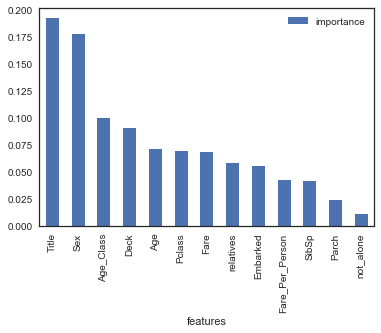

In [80]:
#lets plot the feature importance

importances.plot.bar()

In [81]:
'''
not_alone and Parch doesnt play an important role in our random forest classifier prediction process.
Hence I am dropping them from the dataset and train the classifier again.
We can remove features but that would require a more detailed and in depth investigation. 
Lets just remove not_alone and Parch for now
'''

'\nnot_alone and Parch doesnt play an important role in our random forest classifier prediction process.\nHence I am dropping them from the dataset and train the classifier again.\nWe can remove features but that would require a more detailed and in depth investigation. \nLets just remove not_alone and Parch for now\n'

In [82]:
# lets drop not_alone and Parch from test and train df

train_df = train_df.drop('not_alone', axis = 1)
test_df = test_df.drop('not_alone', axis = 1)

train_df = train_df.drop('Parch', axis = 1)
test_df = test_df.drop('Parch', axis = 1)


In [83]:
#lets see how our df looks now
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,relatives,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,1,8,1.0,6,0
1,1,1,1,5,1,3,1,1,3,3.0,5,1
2,1,3,1,3,0,0,0,0,8,2.0,9,0
3,1,1,1,5,1,3,0,1,3,3.0,5,1
4,0,3,0,5,0,1,0,0,8,1.0,15,1


In [84]:
# Training Random Forest again:

random_forest = RandomForestClassifier(n_estimators = 100, oob_score = True)

random_forest.fit(X_train, Y_train)

Y_Prediction = random_forest.predict(X_test)

#checking the score now

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

print('The score of Random Forest after feature selection: ', acc_random_forest, '%')



The score of Random Forest after feature selection:  92.82 %


In [85]:
'''
Our random forest predicts as good as it did before. 
A general rule is that, the more features you have, the more likely your model will suffer from overfitting and vice versa. 
But I think our data looks fine for now and hasn't too much features.

There is also another way to evaluate a random-forest classifier, 
which is probably much more accurate than the score we used before. 
What I am talking about is the out-of-bag samples to estimate the generalization accuracy. 
I will not go into details here about how it works. 
Just note that out-of-bag estimate is as accurate as using a test set of the same size as the training set. 
Therefore, using the out-of-bag error estimate removes the need for a set aside test set.
'''

"\nOur random forest predicts as good as it did before. \nA general rule is that, the more features you have, the more likely your model will suffer from overfitting and vice versa. \nBut I think our data looks fine for now and hasn't too much features.\n\nThere is also another way to evaluate a random-forest classifier, \nwhich is probably much more accurate than the score we used before. \nWhat I am talking about is the out-of-bag samples to estimate the generalization accuracy. \nI will not go into details here about how it works. \nJust note that out-of-bag estimate is as accurate as using a test set of the same size as the training set. \nTherefore, using the out-of-bag error estimate removes the need for a set aside test set.\n"

In [86]:
#lets check the oob score


print('oob score: ', round(random_forest.oob_score_, 4) * 100, '%')

oob score:  81.48 %


In [87]:
#hyper parameter tuning

'''
Below you can see the code of the hyperparamter tuning for the parameters criterion, 
min_samples_leaf, min_samples_split and n_estimators.
'''

'''param_grid = { "criterion" : ["gini", "entropy"], 
              "min_samples_leaf" : [1, 5, 10, 25, 50, 70], 
              "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], 
              "n_estimators": [100, 400, 700, 1000, 1500]}



from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestClassifier(n_estimators = 100, max_features = 'auto', oob_score = True, random_state =1, n_jobs = -1)

clf = GridSearchCV(estimator = rf, param_grid = param_grid, n_jobs = -1)

clf.fit(X_train, Y_train)

clf.best_params_

'''


'param_grid = { "criterion" : ["gini", "entropy"], \n              "min_samples_leaf" : [1, 5, 10, 25, 50, 70], \n              "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], \n              "n_estimators": [100, 400, 700, 1000, 1500]}\n\n\n\nfrom sklearn.model_selection import GridSearchCV, cross_val_score\n\nrf = RandomForestClassifier(n_estimators = 100, max_features = \'auto\', oob_score = True, random_state =1, n_jobs = -1)\n\nclf = GridSearchCV(estimator = rf, param_grid = param_grid, n_jobs = -1)\n\nclf.fit(X_train, Y_train)\n\nclf.best_params_\n\n'

In [88]:
'''
The above code takes a lot of time to run and the kernel remains busy for a longer time. Hence commented that section. 
The above section is to find out which criterion, no of sample leaf, no of sample split and n_estimator gives the best results.

The answer we got was criterion = 'gini'
min_sample_leaf = 1
min_sample_split = 10,
n_estimators = 100
'''

"\nThe above code takes a lot of time to run and the kernel remains busy for a longer time. Hence commented that section. \nThe above section is to find out which criterion, no of sample leaf, no of sample split and n_estimator gives the best results.\n\nThe answer we got was criterion = 'gini'\nmin_sample_leaf = 1\nmin_sample_split = 10,\nn_estimators = 100\n"

In [89]:
# lets test our model with these paramters


random_forest = RandomForestClassifier(criterion = 'gini',
                                      min_samples_leaf = 1,
                                      min_samples_split = 10,
                                      max_features = 'auto',
                                      oob_score = True,
                                      random_state = 1,
                                      n_jobs = -1)

random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

#Lets check the score of the model

print('The score of Random Forest model is: ', round(random_forest.score(X_train, Y_train) * 100,2), '%')

#lets check the oob score

print('oob score: ', round(random_forest.oob_score_, 4) * 100, '%')



C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


The score of Random Forest model is:  89.0 %
oob score:  83.05 %


In [90]:
'''
Now that we have a proper model, we can start evaluating it's performace in a more accurate way. 
Previously we only used accuracy and the oob score, which is just another form of accuracy. 
The problem is just, that it's more complicated to evaluate a classification model than a regression model. 
I will discuss it further.
'''

"\nNow that we have a proper model, we can start evaluating it's performace in a more accurate way. \nPreviously we only used accuracy and the oob score, which is just another form of accuracy. \nThe problem is just, that it's more complicated to evaluate a classification model than a regression model. \nI will discuss it further.\n"

In [91]:
# Further Evaluation

# Confusion Matrix


from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions = cross_val_predict(random_forest, X_train, Y_train, cv = 3)

confusion_matrix(Y_train, predictions)



C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably me

array([[487,  62],
       [ 86, 256]])

In [92]:
'''
The first row is about the not-survived-predictions: 
492 passengers were correctly classified as not survived (called true negatives) and 
57 where wrongly classified as not survived (false positives).

The second row is about the survived-predictions: 
93 passengers where wrongly classified as survived (false negatives) and 
249 where correctly classified as survived (true positives).

A confusion matrix gives you a lot of information about how well your model does, 
but theres a way to get even more, like computing the classifiers precision.
'''

'\nThe first row is about the not-survived-predictions: \n492 passengers were correctly classified as not survived (called true negatives) and \n57 where wrongly classified as not survived (false positives).\n\nThe second row is about the survived-predictions: \n93 passengers where wrongly classified as survived (false negatives) and \n249 where correctly classified as survived (true positives).\n\nA confusion matrix gives you a lot of information about how well your model does, \nbut theres a way to get even more, like computing the classifiers precision.\n'

In [93]:
# Lets calculate precision and recall

from sklearn.metrics import precision_score, recall_score

print('Precision: ', precision_score(Y_train, predictions))
print('Recall: ', recall_score(Y_train, predictions))

Precision:  0.805031446541
Recall:  0.748538011696


In [ ]:
'''
Our model predicts 81% of the time, a passengers survival correctly (precision). 
The recall tells us that it predicted the survival of 72 % of the people who actually survived.
'''

In [ ]:
'''
You can combine precision and recall into one score, which is called the F-score. 
The F-score is computed with the harmonic mean of precision and recall. Note that it assigns much more weight to low values. 
As a result of that, the classifier will only get a high F-score, if both recall and precision are high.
'''

In [94]:
# Lets calculate the F score of the model


from sklearn.metrics import f1_score

f1_score(Y_train, predictions)

0.77575757575757576

In [ ]:
# there we have a f score of 77%. This score is not that high because we have a recall of 73%


'''
But unfortunately the F-score is not perfect, because it favors classifiers that have a similar precision and recall. 
This is a problem, because you sometimes want a high precision and sometimes a high recall. 
The thing is that an increasing precision, sometimes results in an decreasing recall and vice versa (depending on the threshold). 
This is called the precision/recall tradeoff. We will discuss this in the following section.
'''


In [114]:
# Precision - Recall Curve

'''
For each person the Random Forest algorithm has to classify, 
it computes a probability based on a function and it classifies the person as survived
(when the score is bigger the than threshold) or 
as not survived (when the score is smaller than the threshold). That's why the threshold plays an important part.

We will plot the precision and recall with the threshold using matplotlib:
'''




from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predicitions

y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]          

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)  # predicting the precision, recall and threshold for all the values


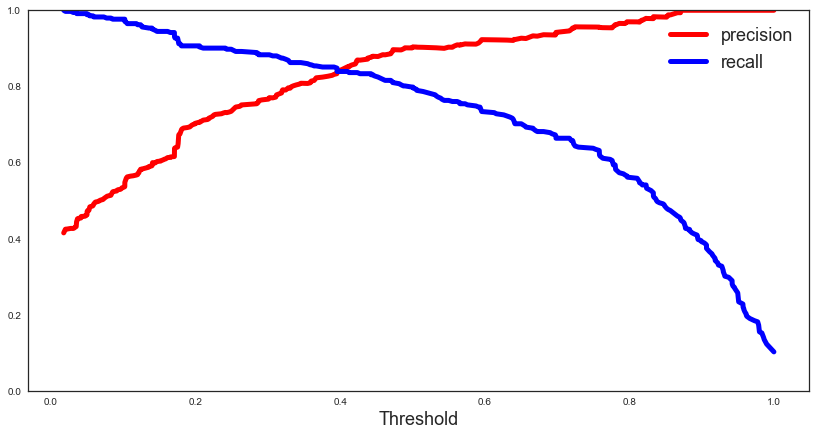

In [121]:
# plotting the  precision recall curve

def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], 'r-', label = 'precision', linewidth = 5)
    plt.plot(threshold, recall[:-1], 'b', label = 'recall', linewidth = 5)
    plt.xlabel('Threshold', fontsize = 18)
    plt.legend(loc="upper right", fontsize=18)
    plt.ylim([0,1])
    

plt.figure(figsize=(14,7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()


In [ ]:
'''
Above you can clearly see that the recall is falling of rapidly at a precision of around 85%. 
Because of that you may want to select the precision/recall tradeoff before that - maybe at around 75 %.

You are now able to choose a threshold, that gives you the best precision/recall tradeoff for your current machine 
learning problem. If you want for example a precision of 80%, you can easily look at the plots and see that you 
would need a threshold of around 0.4. Then you could train a model with exactly that threshold and 
would get the desired accuracy.

'''

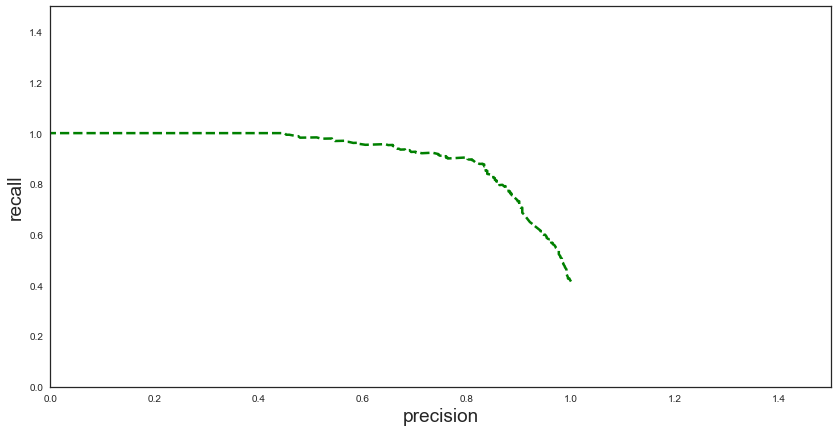

In [126]:
#Another way is to plot the precision and recall against each other:

def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, 'g--', linewidth = 2.5)
    plt.ylabel('recall', fontsize = 19)
    plt.xlabel('precision', fontsize = 19)
    
    plt.axis([0,1.5,0,1.5])
    

plt.figure(figsize = (14,7))
plot_precision_vs_recall(precision, recall)
plt.show()

In [ ]:
'''
ROC AUC Curve

Another way to evaluate and compare your binary classifier is provided by the ROC AUC Curve. 
This curve plots the true positive rate (also called recall) 
against the false positive rate (ratio of incorrectly classified negative instances), 
instead of plotting the precision versus the recall.
'''

In [127]:
# ROC AUC Curve


from sklearn.metrics import roc_curve

# compute the TP rate and FP rate

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)


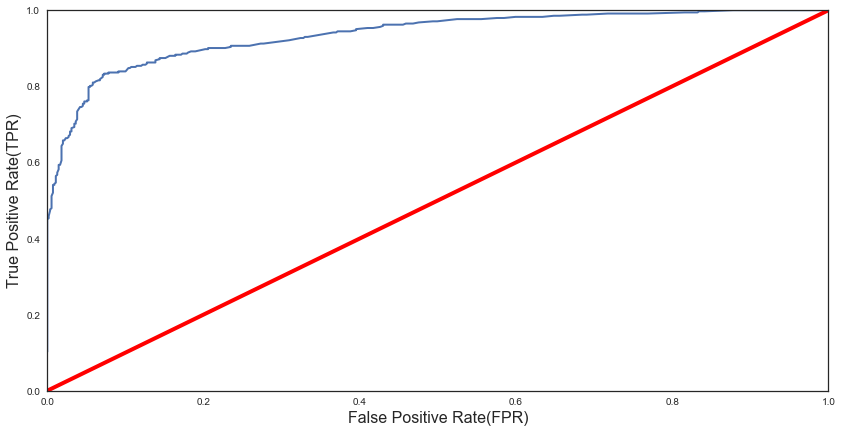

In [132]:
#plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label = None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth = 2, label = label)
    plt.plot([0,1],[0,1], 'r', linewidth = 4)
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate(FPR)', fontsize = 16)
    plt.ylabel('True Positive Rate(TPR)', fontsize = 16)

plt.figure(figsize = (14,7))

plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()
    
    


In [ ]:
'''
Our Random Forest model seems to do a good job.

Of course we also have a tradeoff here, because the classifier produces more false positives, 
the higher the true positive rate is.
'''

In [133]:
# lets compute the ROC AUC Score

# its the area under the curve - perfect is 1 and  completely random classifier will have a score of 0.5

from sklearn.metrics import roc_auc_score

r_a_score = roc_auc_score(Y_train, y_scores)

print('ROC AUC Score is: ', r_a_score)


ROC AUC Score is:  0.935962781879


In [ ]:
# thats a good score to consider


In [134]:
# now lets conclude the work by exporting predictions to a csv file

predictions_rf = pd.DataFrame({
        'PassengerID': test_df['PassengerId'],
        'Survived': Y_prediction
})

predictions_rf.to_csv('Predictions_RF.csv', index = False)